In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Euler implícito para um PVI com uma EDO

In [10]:
def euler(f, x0, xf, y0, h):
    '''
    f: y'/y'' = f(x, y)
    y0: y inicial
    x0: x inicial
    xf: x final
    h: passo (ex. 0.1)
    '''
    # para salvar os x, y por iteração
    x = []
    y = []

    x.append(x0)
    y.append(y0)

    # de x0 a xf com passo h
    while x[-1] < xf:
        i = len(x) - 1
        x.append(round((x[i] + h), 2))
        y.append(round((y[i] + h*f(x[i], y[i])), 3))
    return x, y

Exemplo
$$y' = 2xy$$
$$y(0) = 1$$

$$h = 0,2$$
$$0 \leq x \leq 1$$

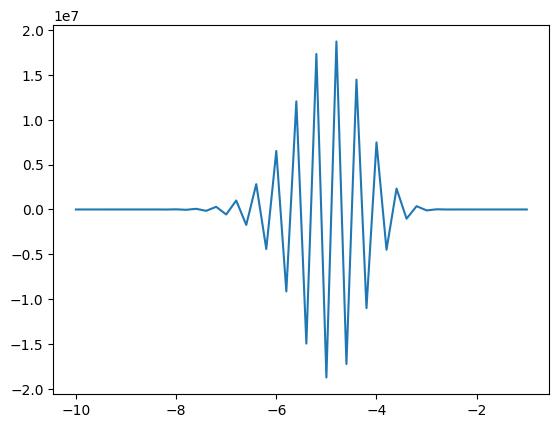

In [11]:
def f(x, y):
    return 2*x*y

x, y = euler(f, -10, -1, 1, 0.2)
plt.plot(x, y)
plt.show()

Exemplo 2

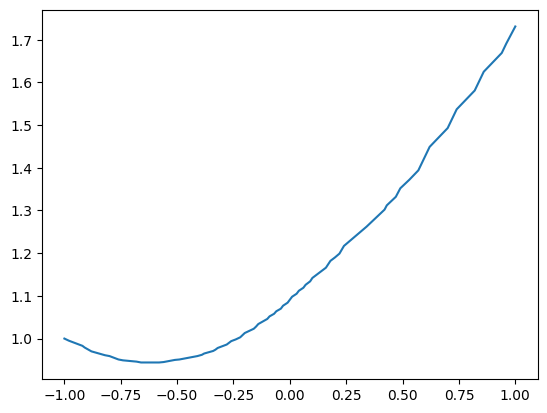

In [12]:
def f(x, y):
    return np.sin(x) + np.cos(y)

x, y = euler(f, -1, 1, 1, 0.015)
plt.plot(x, y)
plt.show()

Exemplo 3

In [13]:
def f(x, y):
    return x - 2*y + 1

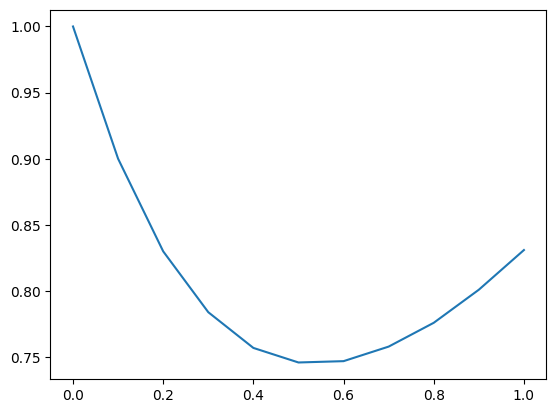

In [14]:
x, y = euler(f, 0, 1, 1, 0.1)
plt.plot(x, y)
plt.show()

# 2) Euler implícito para um PVI com um sistema de duas EDO's

In [15]:
def euler2(f1, f2, x0, xf, y1_0, y2_0, h):
    x = []

    # cálculos iniciais
    y = [[] for _ in range(2)]
    y[0].append(y1_0)
    y[1].append(y2_0)

    f = [[] for _ in range(2)]
    f[0].append(f1(x0, y1_0, y2_0))
    f[1].append(f2(x0, y1_0, y2_0))
    
    x.append(x0)

    # de x0 a xf com passo h
    while x[-1] < xf:
        i = len(x) - 1
        x.append(round((x[i] + h), 2))
        y[0].append(round((y[0][i] + h*f[0][i]), 3))
        y[1].append(round((y[1][i] + h*f[1][i]), 3))
        
        f[0].append(round((f1(x[i], y[0][i], y[1][i])), 3))
        f[1].append(round((f2(x[i], y[0][i], y[1][i])), 3))
    return x, y

Exemplo

In [16]:
def f1(x, y1, y2):
    return 2*x*y1 + y2

def f2(x, y1, y2):
    return -y2 + y1*y2

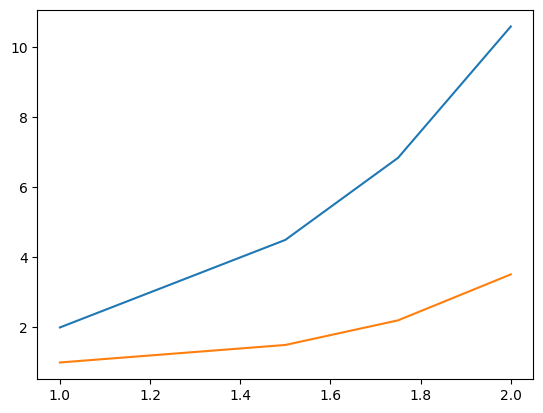

In [17]:
x, y = euler2(f1, f2, 1, 2, 2, 1, 0.25)

plt.plot(x, y[0])
plt.plot(x, y[1])
plt.show()

Exemplo 2

In [18]:
def f1(x, y1, y2):
    return x**2 + y1 + y2

def f2(x, y1, y2):
    return (np.exp(x) * np.sqrt(y2)) - y1

/tmp/ipykernel_19268/1804549545.py:5: RuntimeWarning: invalid value encountered in sqrt
  return (np.exp(x) * np.sqrt(y2)) - y1


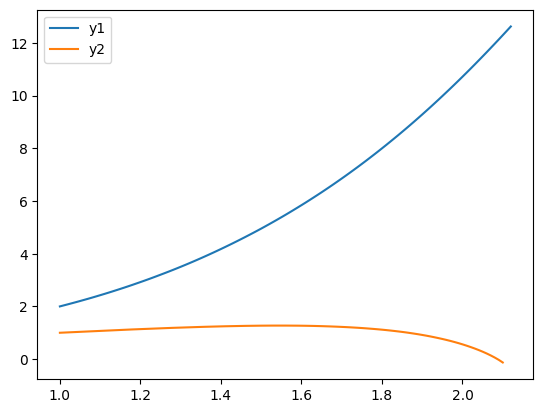

In [19]:
x, y = euler2(f1, f2, 1, 20, 2, 1, 0.01)

plt.plot(x, y[0])
plt.plot(x, y[1])
plt.legend(['y1', 'y2'])
plt.show()

# 3) Runge-Kutta de quarta ordem para um PVI com uma EDO

In [38]:
def RK4(f, x0, xf, y0, h):
    '''
    f: y' = f(x, y)
    y0: y inicial
    x0: x inicial
    tal que
        y(x0) = y0
    
    xf: x final
    tal que
        x0 <= x <= xf
    
    h: passo (ex. 0.1)
    '''
    def f_K1(f, x, y):
        return f(x, y)

    def f_K2(f, x, y, K1, h):
        return f(x + (h/2), y + ((h/2) * K1))

    def f_K3(f, x, y, K2, h):
        return f(x + (h/2), y + ((h/2) * K2))

    def f_K4(f, x, y, K3, h):
        return f(x + (h/2), y + (h * K3))

    # para salvar os valores por iteração
    K = [[] for _ in range(4)]
    x = []
    y = []

    x.append(x0)
    y.append(y0)

    # de x0 a xf com passo h
    while x[-1] < xf:
        i = len(x) - 1
        K[0].append(f_K1(f, x[i], y[i]))
        K[1].append(f_K2(f, x[i], y[i], K[0][i], h))
        K[2].append(f_K3(f, x[i], y[i], K[1][i], h))
        K[3].append(f_K4(f, x[i], y[i], K[2][i], h))

        yi_mais1 = y[i] + ((h/6) * (K[0][i] + 2*(K[1][i] + K[2][i]) + K[3][i]))
        y.append(round(yi_mais1, 3))
        x.append(round((x[i] + h), 2))

    return x, y

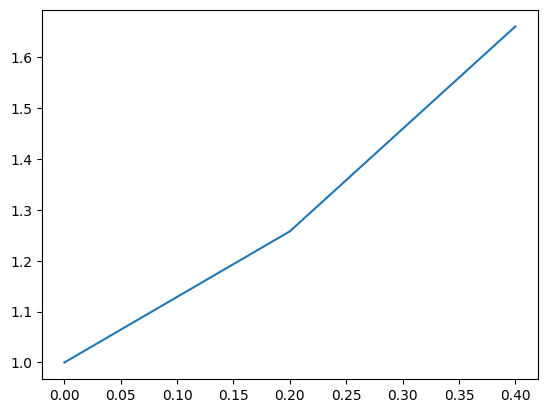

In [41]:
# primeiro exemplo dia 16/07
def f(x, y):
    return 2*x + y

x, y = RK4(f, 0, 0.4, 1, 0.2)
plt.plot(x, y)
plt.show()

# 4) Runge-Kutta de quarta ordem para um PVI com um sistema de duas EDO's

In [42]:
def RK4_2(f1, f2, x0, xf, y1_0, y2_0, h):
    def f_K1(f, x, y1, y2):
        return f(x, y1, y2)

    def f_K2(f, x, y1, y2, K1, h):
        return f(x + (h/2), y1 + ((h/2) * K1), y2 + ((h/2) * K1))

    def f_K3(f, x, y1, y2, K2, h):
        return f(x + (h/2), y1 + ((h/2) * K2), y2 + ((h/2) * K2))

    def f_K4(f, x, y1, y2, K3, h):
        return f(x + (h/2), y1 + (h * K3), y2 + (h * K3))

    # para salvar os valores por iteração
    K = [[] for _ in range(4)]
    x = []
    y = [[] for _ in range(2)]

    x.append(x0)
    y[0].append(y1_0)
    y[1].append(y2_0)

    # de x0 a xf com passo h
    while x[-1] < xf:
        i = len(x) - 1
        K[0].append(f_K1(f1, x[i], y[0][i], y[1][i]))
        K[1].append(f_K2(f1, x[i], y[0][i], y[1][i], K[0][i], h))
        K[2].append(f_K3(f1, x[i], y[0][i], y[1][i], K[1][i], h))
        K[3].append(f_K4(f1, x[i], y[0][i], y[1][i], K[2][i], h))

        y1_mais1 = y[0][i] + ((h/6) * (K[0][i] + 2*(K[1][i] + K[2][i]) + K[3][i]))

        K[0][i] = f_K1(f2, x[i], y[0][i], y[1][i])
        K[1][i] = f_K2(f2, x[i], y[0][i], y[1][i], K[0][i], h)
        K[2][i] = f_K3(f2, x[i], y[0][i], y[1][i], K[1][i], h)
        K[3][i] = f_K4(f2, x[i], y[0][i], y[1][i], K[2][i], h)

        y2_mais1 = y[1][i] + ((h/6) * (K[0][i] + 2*(K[1][i] + K[2][i]) + K[3][i]))

        y[0].append(round(y1_mais1, 3))
        y[1].append(round(y2_mais1, 3))

        x.append(round((x[i] + h), 2))

    return x, y

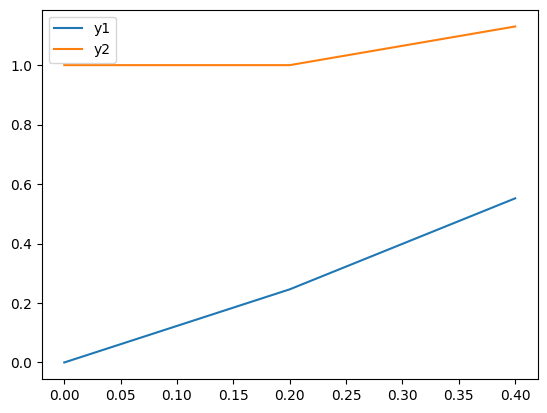

In [44]:
def f1(x, y1, y2):
    return y1 + y2

def f2(x, y1, y2):
    return 2*y1*y2

x, y = RK4_2(f1, f2, 0, 0.4, 0, 1, 0.2)

plt.plot(x, y[0])
plt.plot(x, y[1])
plt.legend(['y1', 'y2'])
plt.show()